# Normal steps in training

In [1]:
import torch
import torch.nn as nn
# from fastai.vision.all import *

In [2]:
lenet = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(400, 120),
            nn.Dropout(p=0.5),
            nn.Linear(120, 84),
            nn.Dropout(p=0.5),
            nn.Linear(84,10)      
)

In [3]:
def look_in_seq(net, X):
    out = X
    for layer in net:
        out = layer(out)
        print(f"For {layer.__class__.__name__} shape: {out.shape}")

In [4]:
X = torch.randn(10,1,28,28)

In [5]:
look_in_seq(lenet,X)

# at least it shows it can handle inputs that have 1 channel 

For Conv2d shape: torch.Size([10, 6, 28, 28])
For ReLU shape: torch.Size([10, 6, 28, 28])
For AvgPool2d shape: torch.Size([10, 6, 14, 14])
For Conv2d shape: torch.Size([10, 16, 10, 10])
For ReLU shape: torch.Size([10, 16, 10, 10])
For AvgPool2d shape: torch.Size([10, 16, 5, 5])
For Flatten shape: torch.Size([10, 400])
For Linear shape: torch.Size([10, 120])
For Dropout shape: torch.Size([10, 120])
For Linear shape: torch.Size([10, 84])
For Dropout shape: torch.Size([10, 84])
For Linear shape: torch.Size([10, 10])


In [6]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

In [7]:
my_transform = transforms.Compose([
    transforms.ToTensor()
])
train_dataset = datasets.MNIST(download=False, root="../data", train=True, transform=my_transform)
test_dataset = datasets.MNIST(download=False, root="../data", train=False, transform=my_transform)
batch_size=64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True )
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
# train_dataset[0]

tensor([9, 5, 1, 0, 5, 3, 5, 3, 3, 3, 1, 0, 7, 5, 5, 5, 5, 4, 6, 3, 1, 0, 4, 2,
        9, 7, 4, 1, 9, 6, 5, 3, 6, 5, 1, 4, 6, 1, 4, 9, 8, 3, 5, 0, 4, 9, 6, 4,
        7, 2, 9, 9, 9, 7, 3, 6, 5, 6, 8, 3, 0, 9, 1, 7])


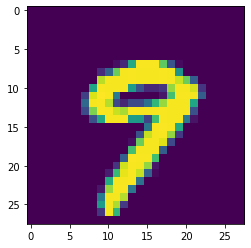

In [9]:
for X, y in train_dataloader:
    break
    
import matplotlib.pyplot as plt

plt.imshow(X[0].permute(1,2,0))
print(y)

In [10]:
def accuracy(y_hat, y):
    return (y_hat.argmax()== y).sum()

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

try lightning training loop from here: https://pytorch-lightning.readthedocs.io/en/latest/common/lightning_module.html

In [37]:
def train_net(net, lr=2e-4, num_epochs=3):
    net = net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr )
    loss = nn.CrossEntropyLoss()
    
    
    train_loss = []
    train_acc = []
    
    for epoch in range(num_epochs):
        loss_val = 0
        number_val = 0
        acc_val = 0
        for X, y in train_dataloader:
            X = X.to(device)
            y = y.to(device)
            
            y_hat = net(X)
            acc_val += accuracy(y_hat, y)
            optimizer.zero_grad()
            
            l = loss(y_hat, y)
            
            l.backward()
            
            optimizer.step()
            
            loss_val += l
            number_val += len(y)
            
        
        acc_factor = (acc_val/number_val).detach().cpu()
        loss_factor = (loss_val/number_val).detach().cpu()
        
#         print(type(acc_factor))
#         break
        
        train_acc.append(acc_factor)
        train_loss.append(loss_factor)
        print(f" For epoch: {epoch+1}")
        print(f" Current accuracy : {acc_factor}")
        print(f" Current loss : {loss_factor}")

    
    plt.plot(range(num_epochs), train_loss)
    plt.show()
    plt.plot(range(num_epochs), train_acc)
    plt.show()

In [13]:
# train_net(lenet,num_epochs=2)

# didnt work with initial accuracy

for lr:  0.1
 For epoch: 1
 Current accuracy : 0.0010833333944901824
 Current loss : 0.008871584199368954
 For epoch: 2
 Current accuracy : 0.0010166666470468044
 Current loss : 0.0024316906929016113
 For epoch: 3
 Current accuracy : 0.0016833333065733314
 Current loss : 0.001781838247552514
 For epoch: 4
 Current accuracy : 0.0027000000700354576
 Current loss : 0.0015033769886940718
 For epoch: 5
 Current accuracy : 0.0013500000350177288
 Current loss : 0.0013466108357533813
 For epoch: 6
 Current accuracy : 0.0017500000540167093
 Current loss : 0.0012095988495275378
 For epoch: 7
 Current accuracy : 0.002283333335071802
 Current loss : 0.001087050884962082
 For epoch: 8
 Current accuracy : 0.00143333338201046
 Current loss : 0.0010362191824242473
 For epoch: 9
 Current accuracy : 0.002400000113993883
 Current loss : 0.0009758159285411239
 For epoch: 10
 Current accuracy : 0.002266666619107127
 Current loss : 0.0009014210081659257


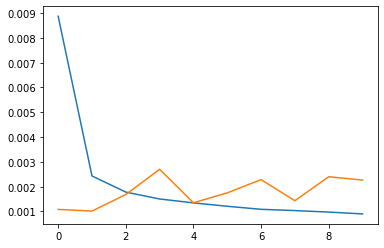

In [14]:
#lr_arr = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
lr_arr = [0.1]
for lr in lr_arr:
    print("for lr: ", lr)
    train_net(lenet, lr=lr, num_epochs=10)

### trying https://github.com/davidtvs/pytorch-lr-finder

In [15]:
!pip install torch-lr-finder

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.55E-01


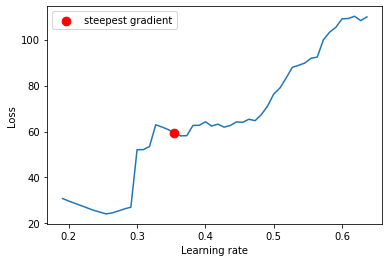

In [16]:
from torch_lr_finder import LRFinder

model = lenet
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device=device)

lr_finder.range_test(train_dataloader, val_loader=test_dataloader, end_lr=1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()


 For epoch: 1
 Current accuracy : 0.00143333338201046
 Current loss : 0.000664678227622062
 For epoch: 2
 Current accuracy : 0.0017999999690800905
 Current loss : 0.0005901044351048768
 For epoch: 3
 Current accuracy : 0.0017333333380520344
 Current loss : 0.0005292880232445896
 For epoch: 4
 Current accuracy : 0.0015666666440665722
 Current loss : 0.0004947406705468893
 For epoch: 5
 Current accuracy : 0.0025500000920146704
 Current loss : 0.00045528329792432487
 For epoch: 6
 Current accuracy : 0.0015666666440665722
 Current loss : 0.00043602270307019353
 For epoch: 7
 Current accuracy : 0.0012333333725109696
 Current loss : 0.0004064282402396202
 For epoch: 8
 Current accuracy : 0.0017666666535660625
 Current loss : 0.00037825695471838117
 For epoch: 9
 Current accuracy : 0.001466666697524488
 Current loss : 0.00035406663664616644
 For epoch: 10
 Current accuracy : 0.0013833333505317569
 Current loss : 0.00034745543962344527


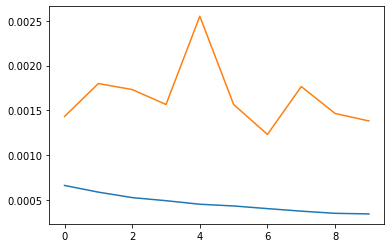

In [17]:
train_net(lenet, lr=2.36e-01, num_epochs=10)

In [18]:
import matplotlib.pyplot as plt

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.91E-01


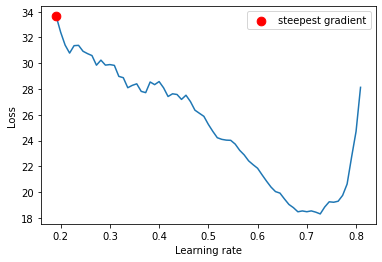

In [19]:
model =lenet
lr_finder = LRFinder(model, optimizer, criterion, device=device)

lr_finder.range_test(train_dataloader, val_loader=test_dataloader, end_lr=1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()


 For epoch: 1
 Current accuracy : 0.001366666634567082
 Current loss : 0.0005235358839854598
 For epoch: 2
 Current accuracy : 0.00143333338201046
 Current loss : 0.0005203408654779196
 For epoch: 3
 Current accuracy : 0.0016499999910593033
 Current loss : 0.0004617722879629582
 For epoch: 4
 Current accuracy : 0.0015833333600312471
 Current loss : 0.000435919821029529
 For epoch: 5
 Current accuracy : 0.0025333333760499954
 Current loss : 0.0003901549498550594
 For epoch: 6
 Current accuracy : 0.0014000000664964318
 Current loss : 0.00037462342879734933
 For epoch: 7
 Current accuracy : 0.0012666666880249977
 Current loss : 0.0003478277358226478
 For epoch: 8
 Current accuracy : 0.001500000013038516
 Current loss : 0.0003290838503744453
 For epoch: 9
 Current accuracy : 0.001550000044517219
 Current loss : 0.0003326989244669676
 For epoch: 10
 Current accuracy : 0.0016666667070239782
 Current loss : 0.00035699448199011385


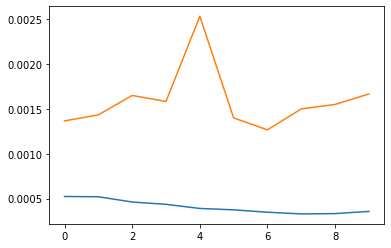

In [20]:
train_net(lenet, lr=3.82e-01, num_epochs=10)

# i fearthere mightbe something wrong with my traning loop.

# update training loop 

from : https://towardsdatascience.com/the-pytorch-training-loop-3c645c56665a

In [22]:
def accuracy(y_hat, y):
    return (torch.argmax(y_hat, dim=1) == y).sum().float().mean()

In [32]:
lr = 0.5
epochs=5

loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(lenet.parameters(), lr=lr)

In [33]:
net = lenet
net = net.to(device)

In [34]:
acc_arr = []
for epoch in range(epochs):
    acc_val = 0
    number = 0
    for X, y in train_dataloader:
        X = X.to(device)
        y = y.to(device)
        pred = lenet(X)
        l = loss_func(pred, y)
        
        acc_val += accuracy(pred,y)
        number += len(y)
        
        optimizer.zero_grad()
        
        l.backward()
        
        optimizer.step()
        
    acc_arr.append(acc_val.detach().cpu()/number)

In [31]:
acc_arr

[tensor(0.9901)]

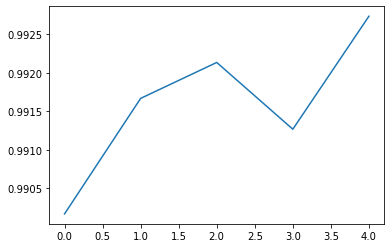

In [35]:
plt.plot(range(epochs), acc_arr)
plt.show()

for lr:  0.1
 For epoch: 1
 Current accuracy : 0.9998833537101746
 Current loss : 1.156185408035526e-05
 For epoch: 2
 Current accuracy : 0.9998999834060669
 Current loss : 1.0979559192492161e-05
 For epoch: 3
 Current accuracy : 0.9999499917030334
 Current loss : 9.673605745774694e-06


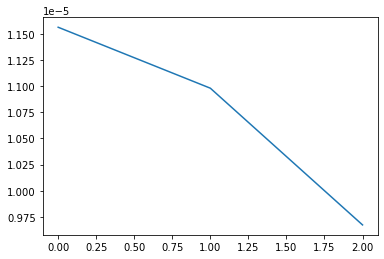

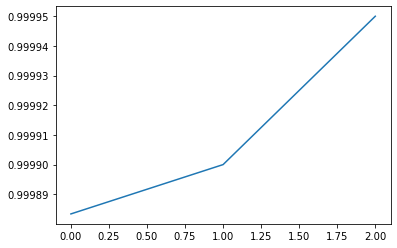

for lr:  0.01
 For epoch: 1
 Current accuracy : 0.9999333620071411
 Current loss : 8.509165127179585e-06
 For epoch: 2
 Current accuracy : 0.9999333620071411
 Current loss : 7.742338311800268e-06
 For epoch: 3
 Current accuracy : 0.9999333620071411
 Current loss : 7.565935447928496e-06


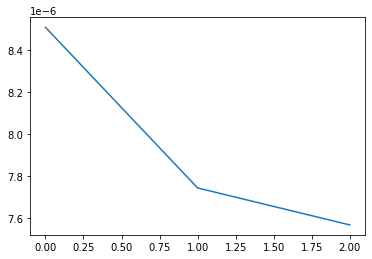

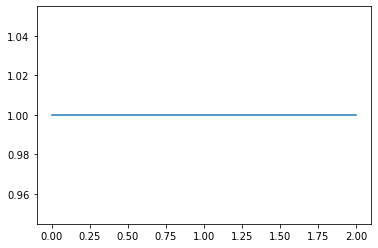

for lr:  0.001
 For epoch: 1
 Current accuracy : 0.9999499917030334
 Current loss : 7.243529125844361e-06
 For epoch: 2
 Current accuracy : 0.9999499917030334
 Current loss : 7.232404641399626e-06
 For epoch: 3
 Current accuracy : 0.9999499917030334
 Current loss : 7.221309260785347e-06


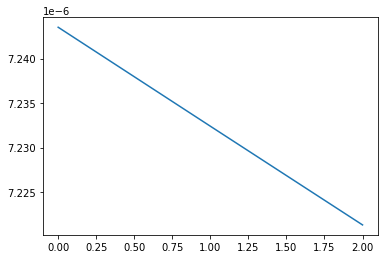

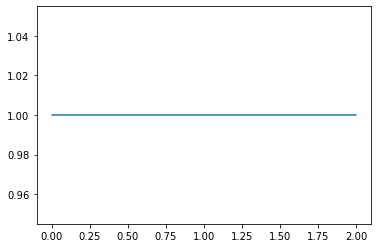

for lr:  0.0001
 For epoch: 1
 Current accuracy : 0.9999499917030334
 Current loss : 7.193267265392933e-06
 For epoch: 2
 Current accuracy : 0.9999499917030334
 Current loss : 7.1904455580806825e-06
 For epoch: 3
 Current accuracy : 0.9999499917030334
 Current loss : 7.19519448466599e-06


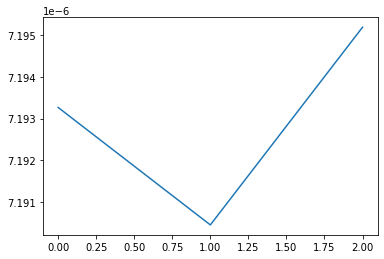

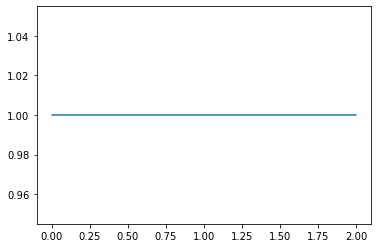

for lr:  1e-05
 For epoch: 1
 Current accuracy : 0.9999499917030334
 Current loss : 7.185664344433462e-06
 For epoch: 2
 Current accuracy : 0.9999499917030334
 Current loss : 7.185768936324166e-06
 For epoch: 3
 Current accuracy : 0.9999499917030334
 Current loss : 7.1873337219585665e-06


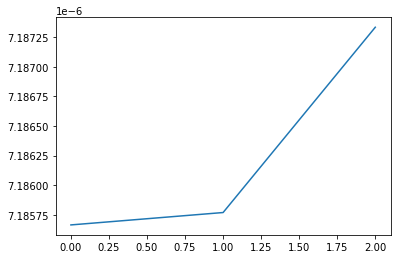

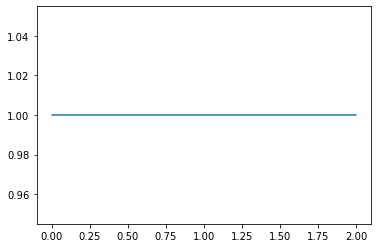

for lr:  1e-06
 For epoch: 1
 Current accuracy : 0.9999499917030334
 Current loss : 7.20085790817393e-06
 For epoch: 2
 Current accuracy : 0.9999499917030334
 Current loss : 7.185168215073645e-06
 For epoch: 3
 Current accuracy : 0.9999499917030334
 Current loss : 7.1852869041322265e-06


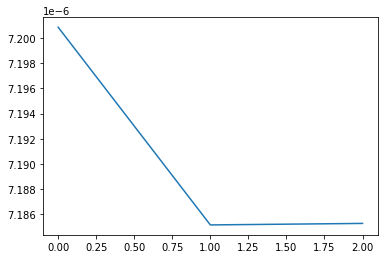

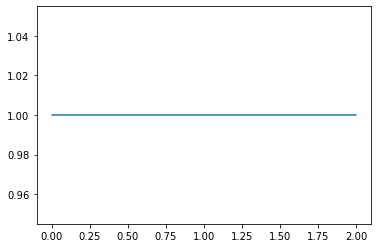

In [39]:
lr_arr = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
# lr_arr = [0.1]
for lr in lr_arr:
    print("for lr: ", lr)
    new_net = lenet
    train_net(new_net, lr=lr, num_epochs=3)

 So my metric for accuracy was wrong.